In [1]:
%reset -f


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# EXPLORACION DE LOS DATOS
https://coastwatch.pfeg.noaa.gov/erddap/griddap/erdQMwindmday_LonPM180.html?x_wind%5B(2023-01-16T00:00:00Z)%5D%5B(10.0)%5D%5B(-18):(-2)%5D%5B(-86):(-70)%5D,y_wind%5B(2023-01-16T00:00:00Z)%5D%5B(10.0)%5D%5B(-18):(-2)%5D%5B(-86):(-70)%5D&.draw=vectors&.vars=longitude%7Clatitude%7Cx_wind%7Cy_wind&.color=0x000000&.bgColor=0xffccccff

In [2]:
data=xr.open_dataset('BISerdQMwindmday_LonPM180_3790_0d0f_ce89.nc')

In [5]:
data.keys()

KeysView(<xarray.Dataset>
Dimensions:    (time: 107, altitude: 1, latitude: 65, longitude: 65)
Coordinates:
  * time       (time) datetime64[ns] 2014-01-16 2014-02-15 ... 2022-12-16
  * altitude   (altitude) float64 10.0
  * latitude   (latitude) float64 -18.0 -17.75 -17.5 -17.25 ... -2.5 -2.25 -2.0
  * longitude  (longitude) float64 -86.0 -85.75 -85.5 ... -70.5 -70.25 -70.0
Data variables:
    x_wind     (time, altitude, latitude, longitude) float32 ...
    y_wind     (time, altitude, latitude, longitude) float32 ...
Attributes: (12/45)
    cdm_data_type:                 Grid
    contact:                       erd.data@noaa.gov
    Conventions:                   CF-1.6, COARDS, ACDD-1.3
    creation_date:                 Fri Feb  3 13:11:11 2023
    creator_email:                 erd.data@noaa.gov
    creator_name:                  NOAA NMFS SWFSC ERD
    ...                            ...
    summary:                       NOAA CoastWatch distributes near real time...
    testOutOfDa

In [7]:
u=data.x_wind.values
v=data.y_wind.values
lon=data.longitude.values
lat=data.latitude.values
time=data.time.values
#=========================
# quitar dimension de altitud
u=np.squeeze(u,axis=1)
v=np.squeeze(v,axis=1)

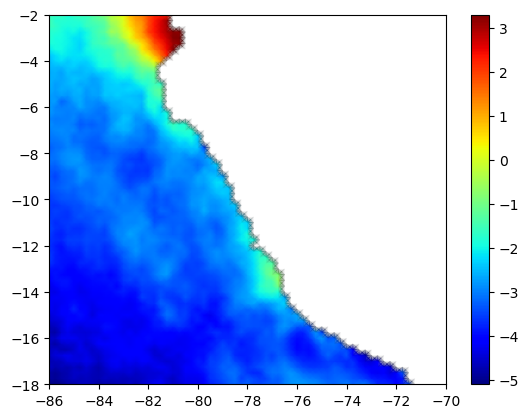

In [9]:
plt.figure(1)
plt.pcolormesh(lon,lat,u[0,:,:],cmap=plt.cm.jet,shading='gouraud')
plt.colorbar()

# CALCULAR MAGNITUD DEL VIENTO

In [45]:
[m,r,c]=u.shape
mag3d=np.ones([m,r,c])*np.nan
for q in range(0,m):#m
    u1=u[q,:,:]
    v1=v[q,:,:]
    mag=np.sqrt(u1**2+v1**2)
    mag3d[q,:,:]=mag

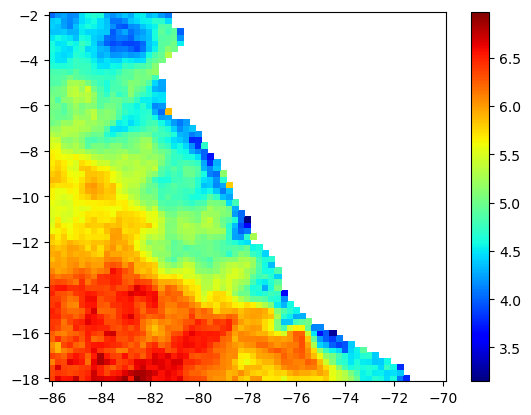

In [18]:
plt.figure()
plt.pcolor(lon,lat,mag,cmap=plt.cm.jet,shading='auto')
plt.colorbar()

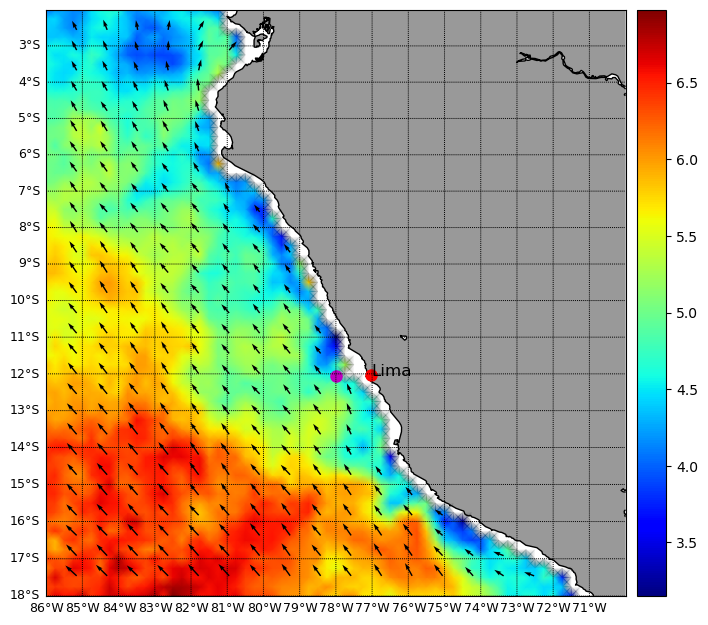

In [35]:
# con basemap

from mpl_toolkits.basemap import Basemap

fig, axes=plt.subplots(figsize=(8,8))

m=Basemap(projection='mill',lat_ts=15,llcrnrlon=lon.min(), \
          urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
          resolution='i')

m.fillcontinents(color='0.6')
m.drawcoastlines()
x,y=m(*np.meshgrid(lon,lat))
#===============================
uproj,vproj,xx,yy=m.transform_vector(u1,v1,lon,lat,20,30,returnxy=True,masked=True)

#===============================
# ubicar un posicion en el mapa
x2,y2=m(-78.0,-12.07)
x3,y3=m(-77.02824,-12.04318)

#===============================

m.pcolormesh(x,y,mag,shading='gouraud',cmap=plt.cm.jet)
m.plot(x2,y2,'om',markersize=8)
m.plot(x3,y3,'or',markersize=8)
plt.text(x3,y3,'Lima',fontsize=12)
m.quiver(xx,yy,uproj,vproj)
m.drawparallels(np.arange(-18,-2,1),labels=[1,0,0,0],linewidth=0.7,fontsize=9)
m.drawmeridians(np.arange(-86,-70,1),labels=[0,0,0,1],linewidth=0.7,fontsize=9)
m.colorbar()
plt.show()





In [36]:
lo=-78.0
la=-12.07

def cercano(x,x0):
    idx=np.abs(x-x0).argmin()
    valCer=x[idx]
    return idx,valCer

[idx,valcerX]=cercano(lon,lo)
[idy,valcerY]=cercano(lat,la)


In [38]:
import os 
os.chdir(r'C:\Users\bajaMSP\Documents\RUTINAS_DIAS_PYTHON_DESDE_CERO')
from funciones_curso import timeDatetime64
yyyy,mm,d=timeDatetime64(time)

In [46]:

magLi=np.ones(len(mm))

for ii in range(0,len(mm)):
    magLi[ii]=mag3d[ii,idy,idx]
    
    

In [48]:
Mes=np.arange(1,13)
meanW=np.ones(12)
stdW=np.ones(12)
for i in range(0,len(Mes)):
    ind=np.where(mm==Mes[i]);ind2=ind[0]
    meanW[i]=np.nanmean(magLi[ind2])
    stdW[i]=np.nanstd(magLi[ind2])

    

Text(0.5, 1.0, 'Climatologia mensual del viento (-78.0,-12.07) entre 2014-2022')

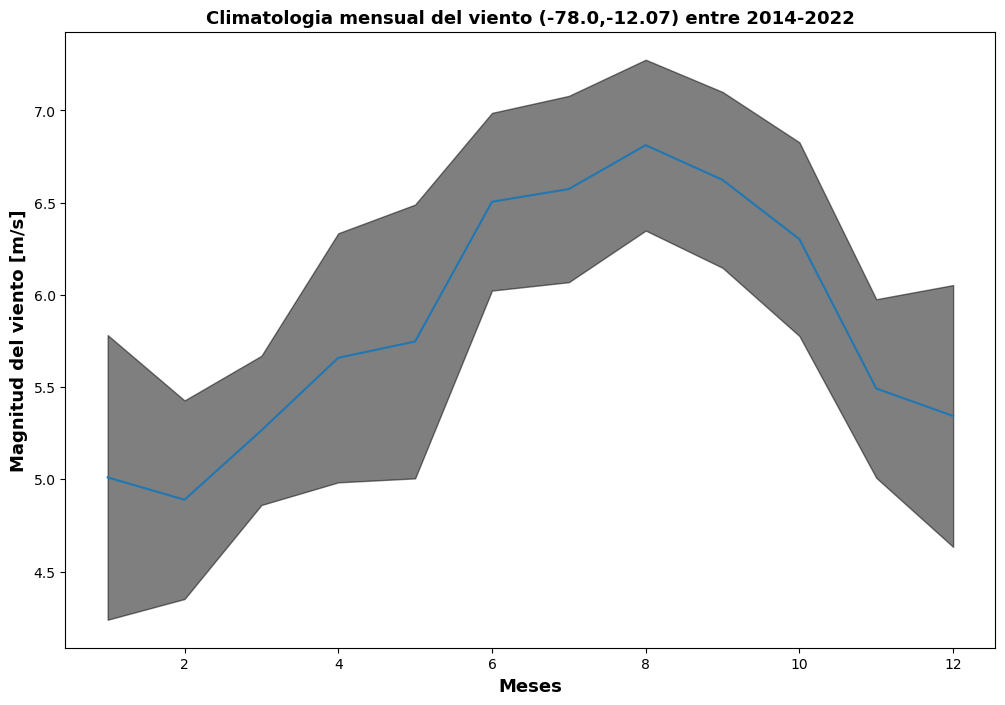

In [58]:
# figura
y=meanW
y_plus_sigma=meanW+stdW
y_minus_sigma=meanW-stdW


plt.figure(figsize=(12,8))
plt.plot(Mes,y)
plt.fill_between(Mes,y_plus_sigma,y_minus_sigma,alpha=0.5,color='k')
plt.ylabel('Magnitud del viento [m/s]',fontsize=13,fontweight='bold')

plt.xlabel('Meses',fontsize=13,fontweight='bold')
plt.title('Climatologia mensual del viento (-78.0,-12.07) entre 2014-2022',fontsize=13,fontweight='bold')